
### **Naive Bayes On MINIST**

# HAMZA MUSTAFA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.datasets import  load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2

In [2]:
dataset = keras.datasets.mnist

(X_raw_train, y_train), (X_raw_test, y_test) = dataset.load_data()

X_train = np.zeros((X_raw_train.shape[0], 108))
X_test = np.zeros((X_raw_test.shape[0], 108))

hog = cv2.HOGDescriptor((28, 28), (14, 14), (7, 7), (14, 14), 12)

for n in range(X_raw_train.shape[0]):
    X_train[n] = hog.compute(X_raw_train[n]).reshape(1, -1)
    
for n in range(X_raw_test.shape[0]):
    X_test[n] = hog.compute(X_raw_test[n]).reshape(1, -1)

11501568/11490434 [==============================] - 0s 0us/step


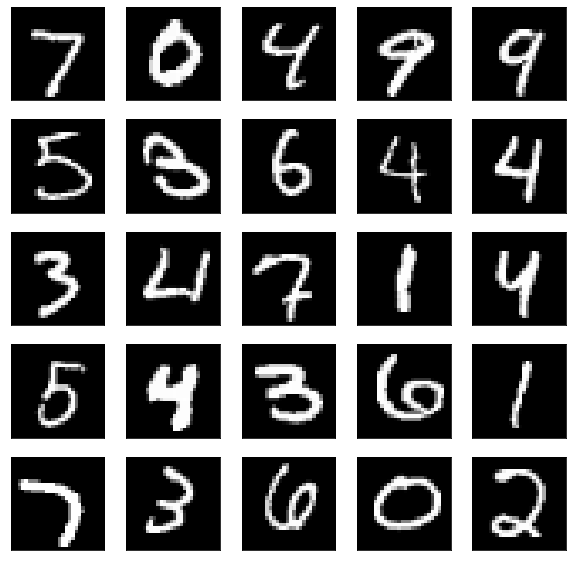

In [3]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
index = 0

for i in range(5):
    for j in range(5):
        cell = ax[i][j]
        cell.set_xticks([])
        cell.set_yticks([])
        cell.grid(False)
        cell.imshow(X_raw_test[index], cmap='gray')
        index += 3
        
plt.show()

In [4]:
_, prob_y = np.unique(y_train, return_counts=True)
prob_y = prob_y / len(y_train)
num_classes = len(prob_y)
prob_y

array([0.09871667, 0.11236667, 0.0993    , 0.10218333, 0.09736667,
       0.09035   , 0.09863333, 0.10441667, 0.09751667, 0.09915   ])

In [ ]:
def log_gaussian(X, mu, sigma):
    return -(np.sum(np.log(sigma)) + 0.5 * np.sum(((X - mu) / sigma) ** 2)).reshape(-1, 1)

In [ ]:
def train_naive_bayes():
    means = np.zeros((num_classes, X_train.shape[1]), dtype=np.float64)
    stdevs = np.zeros((num_classes, X_train.shape[1]), dtype=np.float64)
    
    for k, y_k in enumerate(np.unique(y_train)):
        indices = np.where(y_k == y_train)
        means[k] = np.mean(X_train[indices], axis=0)
        stdevs[k] = np.std(X_train[indices], axis=0)
        
    return means, stdevs

In [ ]:
means, stdevs = train_naive_bayes()
print('Means for class 0:\n', means[0], '\n\nStandard deviations for class 0\n', stdevs[0])

Means for class 0:
 [0.30678743 0.39533906 0.49698065 0.47942126 0.23345504 0.16344804
 0.09279153 0.01742686 0.01565332 0.01517458 0.01731597 0.17423633
 0.44260052 0.43626217 0.43094108 0.29247752 0.06933765 0.05582165
 0.04511124 0.02725237 0.06435403 0.12624306 0.15242024 0.3932381
 0.33039128 0.15454434 0.12076002 0.07976528 0.09248541 0.24739966
 0.29079921 0.26497931 0.36151173 0.36524211 0.31475686 0.3574081
 0.17230083 0.19654137 0.36610455 0.38814007 0.32552076 0.35568275
 0.32603948 0.18848521 0.22032257 0.17830103 0.092407   0.14042486
 0.32399185 0.33429498 0.39768063 0.37237062 0.24249547 0.23246207
 0.18654091 0.0988651  0.13513616 0.15262434 0.13333062 0.26915728
 0.10747293 0.10649556 0.29421138 0.40128702 0.39745421 0.41461391
 0.38427027 0.18927837 0.19220744 0.12930193 0.06576277 0.09647302
 0.27370977 0.08789382 0.09359048 0.11626488 0.10110692 0.23180832
 0.27630185 0.25474979 0.37876405 0.39644995 0.34596988 0.34044592
 0.42185483 0.37627579 0.37949988 0.26628861

In [ ]:
def predict(x):
    return np.argmax([np.log(prob_y[k]) + log_gaussian(x.reshape(1, -1), 
                      means[k], stdevs[k]) for k in range(num_classes)])

In [ ]:
y_pred = np.zeros((X_test.shape[0]))

for n in range(X_test.shape[0]):
    y_pred[n] = predict(X_test[n])

accuracy_score(y_test, y_pred)

0.9151

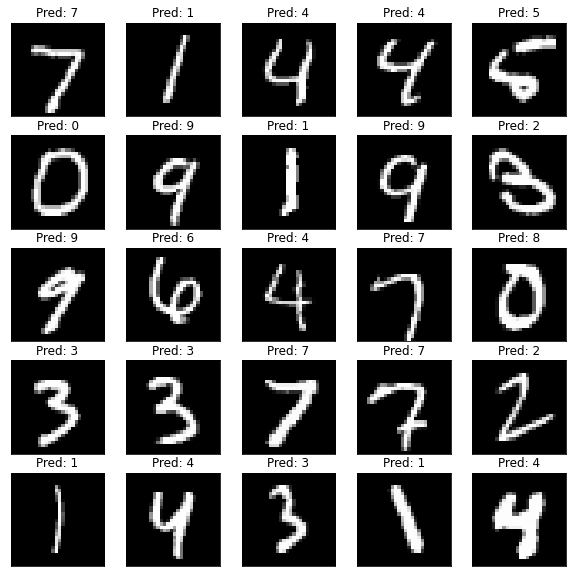

In [ ]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
index = 0

for i in range(5):
    for j in range(5):
        cell = ax[i][j]
        cell.set_title('Pred: %s' % predict(X_test[index]))
        cell.set_xticks([])
        cell.set_yticks([])
        cell.grid(True)
        cell.imshow(X_raw_test[index], cmap='gray')
        index += 2
        
plt.show()